# Support Vector Machine Tutorial
## Introduction
A Support Vector Machine or SVM is a Machine Learning model used mainly in supervised learning that can perform classification and regression. Classification occurs when every input ie a datapoint is mapped to a discrete output (example spam/not spam or male/female). While regression is when an output of a datapoint is predicted generally according to some function. For example 
we can use this straight line to predict a company's sales from the amount of it spends on advertisement.
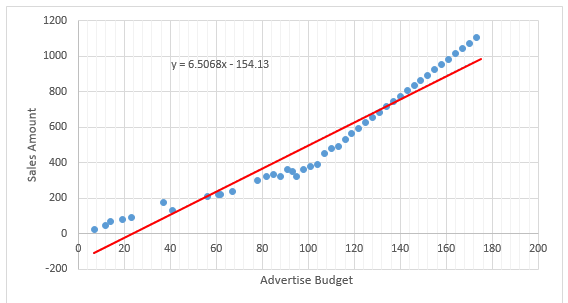

As seen from the function, the higher the advertisement budget the higher the company's sales. This image was taken from codingsight.com

SVM is a model that can perform both of these techniques.More details about SVM will follow.


In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

%matplotlib inline

## Iris dataset
The iris dataset has 3 types of irises that are determined according to 4 features which include sepal and petal length and width.

In [43]:
iris = datasets.load_iris()
flower_type = iris['target']
features = iris['data']
print("types of irises in the data set include ",list(iris.target_names))
print("the features of the irises include ", list(iris.feature_names))


types of irises in the data set include  ['setosa', 'versicolor', 'virginica']
the features of the irises include  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Data preparation
Splitting the data (features) for training and testing. 80% percent of the data is used for training, every datapoint in X_train with its correspending output in y_train are used to train/fit the model. The X_test,remaing 20% of data, is then used to check the accuracy of the model on data it has not seen before, this is done by comparing the output of the model on X_test with the actual output of X_test that is y_test.
The test_size paramater is used to determine the proportion of the data used in testing, random_state parameter is the random number generator if it is not set to a constant the instance will be generated by numpy.random

In [44]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, flower_type, test_size=0.2, random_state=15)

In [ ]:
svm_clf = Pipeline((
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
))
svm_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import r2_score
y_predict = svm_clf.predict(X_test)
score = r2_score(y_test,y_predict)
score

In [ ]:
from sklearn import grid_search
params = {'C': np.logspace(start =-5,stop =15,base =2)}
lsvm =  LinearSVC(loss="hinge",random_state = 0)
grid = grid_search.GridSearchCV(lsvm, params)
grid = grid.fit(X_train,y_train)
best = grid.best_estimator_
y_predictgs = best.predict(X_test)
scoregs = r2_score(y_test,y_predictgs)
print("score is {}".format(scoregs))
best.get_params()['C']


In [18]:
from sklearn.svm import SVC
from sklearn.metrics import r2_score
polykernel = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf",gamma ='auto'))
))
polykernel.fit(X_train, y_train)
y_predictpoly = polykernel.predict(X_test)
scorepoly = r2_score(y_test,y_predictpoly)
scorepoly

1.0